<a href="https://colab.research.google.com/github/kairamilanifitria/NLP-A/blob/main/Project%201%20Sentiment%20Analysis/Project_1_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Cleaning ✅

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/tweet.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


In [ ]:
! pip install nltk

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [ ]:
# Convert 'tweet' column to string
df['tweet'] = df['tweet'].astype(str)

# Convert 'sentimen' column to categorical type
df['sentimen'] = df['sentimen'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sentimen  1815 non-null   category
 1   tweet     1815 non-null   object  
dtypes: category(1), object(1)
memory usage: 16.2+ KB


In [ ]:
from nltk.corpus import stopwords
import nltk

# Download the stopwords list if not already downloaded
nltk.download('stopwords')

# Get Indonesian stopwords
stop_words = set(stopwords.words('indonesian')) # Use words instead of get

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'pic\.twitter\.com/\S+', '', text)

    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning function to the 'tweet' column
df['tweet_clean'] = df['tweet'].apply(clean_text)


In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia semakin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesiaku 2 perekonomian makin membaik putihkan gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn mendukung perekonomian negara bersama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu majukan perekonomian bangsa bersama pak jokowi yuk


In [ ]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Apply stopwords removal function to the 'tweet' column
df['tweet_clean'] = df['tweet_clean'].apply(remove_stopwords)


In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batuan langka tasbih jokowi hadiah habib luthfi seharga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakatnya ngeluh negara ngutang negara ngutang utang dibayar kalo negara dapet penghasilan penghasilan negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga mengedepankan harga bangsanya yg berdaulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesiaku 2 perekonomian membaik putihkan gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn mendukung perekonomian negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu majukan perekonomian bangsa jokowi yuk


# 2. Text Normalization ✅

## 2.1 Lemmatization : nlp_id ✅

In [ ]:
! pip install nlp-id

In [ ]:
from nlp_id.lemmatizer import Lemmatizer

def lemmetize_indonesian(text):
    # Create an instance of the stemmer
    lemmatizer = Lemmatizer()
    tokens = text.split()
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Combine lemmatized tokens back into a single string (if needed)
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Print the original and lemmatized tokens and text
    print("Original Tokens:", tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Lemmatized Text:", lemmatized_text)
    return lemmatized_text

df["tweet_clean"] = df['tweet_clean'].apply(lemmetize_indonesian)

Streaming output truncated to the last 5000 lines.
Lemmatized Tokens: ['penting', 'prabowo', 'sandi', 'komitmen', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'dukung', 'si', 'jae', 'ga', 'tuju', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'moga', 'prabowo', 'pimpin', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae']
Lemmatized Text: penting prabowo sandi komitmen turun harga listrik 900 w udah gitu aja dukung si jae ga tuju dukung prabowo sandi tuju aja moga prabowo pimpin tepat janji kampanye ga kayak si jae
Original Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Text: jokowi warga papua hak rasa harga bbm pulau jawa jkw amin hamterjamin 01ndonesia maju
Original Tokens: ['skill', 'anak', 'bangsa', 'harga', 'nega

In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [ ]:
# Write csv
file_path = 'text_lemmatize_1.csv'
df.to_csv(file_path, index=False)

## 2.1.b Stemming : Sastrawi ✅

In [ ]:
! pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.0 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

def lemmatization_indonesian(text):
    # Create a stemmer for Indonesian
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tokens = text.split()

    # Lemmatization for Indonesian
    lemmatized_tokens = [stemmer.stem(token) for token in tokens]
    # Combine lemmatized tokens back into a single string (if needed)
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Print the original and lemmatized tokens and text
    print("Original Tokens:", tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Lemmatized Text:", lemmatized_text)
    return lemmatized_text

df["tweet_clean"] = df['tweet_clean'].apply(lemmatization_indonesian)


Streaming output truncated to the last 5000 lines.
Lemmatized Tokens: ['penting', 'prabowo', 'sandi', 'komitmen', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'dukung', 'si', 'jae', 'ga', 'tuju', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'moga', 'prabowo', 'pimpin', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae']
Lemmatized Text: penting prabowo sandi komitmen turun harga listrik 900 w udah gitu aja dukung si jae ga tuju dukung prabowo sandi tuju aja moga prabowo pimpin tepat janji kampanye ga kayak si jae
Original Tokens: ['jokowi', 'warga', 'papua', 'berhak', 'merasakan', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Text: jokowi warga papua hak rasa harga bbm pulau jawa jkw amin hamterjamin 01ndonesia maju
Original Tokens: ['skill', 'anak', 'bangsa', 'dihar

In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [ ]:
# Write csv
file_path = 'text_lemmatize_2_sastrawi.csv'
df.to_csv(file_path, index=False)

## 2.2.a Vectorization : CountVectorizer ✅

In [ ]:
!pip install scikit-learn
!pip install nlp_id
!pip install keras-tuner

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 107.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b1b9277aea1fa0aa009db8b7b4fd323d1a536b0ef0fa2331dd7811d5bfb80bee
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: huggingface-hub
    Found 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import gensim.downloader as gensim_api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import transformers
import torch
import keras_tuner as kt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# pakai data hasil lemmatization dengan nlp_id
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task1 : Sentiment Analysis /text_lemmatize_1.csv')
df

,sentimen,tweet,tweet_clean
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,prabowo indonesia harga bangsa asing berita ho...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",era jokowi ekonomi indonesia 01 indonesia maju...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",sumatera selatan asi games dampak pd ekonomi l...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara ngutang bngun infrastruktur udah dipake...
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,negarawan sejati sll bangga depan harga bangsa...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,1 hrs ceramah damai indonesia 2 ekonomi baik p...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,mari bangun bangsa dgn dukung ekonomi negara j...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,bantu maju ekonomi bangsa jokowi yuk


In [ ]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]


In [ ]:
# Initialize CountVectorizer
cv_vectorizer = CountVectorizer()

# Fit and transform the lemmatized text
X = cv_vectorizer.fit_transform(lemmatized_texts)

# Convert to array if you want to see the result in array format
vectorized_array = X.toarray()

# Get feature names (vocabulary terms)
feature_names = cv_vectorizer.get_feature_names_out()

# Display the vectorized text and feature names
print("Feature Names:", feature_names)
print("Vectorized Array:\n", vectorized_array)

Feature Names: ['000' '01' '01ndonesia' ... 'zippo' 'zon' 'zonk']
Vectorized Array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cv_vectorizer.vocabulary_

{'prabowo': 3943,
 'indonesia': 1902,
 'harga': 1736,
 'bangsa': 499,
 'asing': 400,
 'berita': 630,
 'hoax': 1809,
 'buat': 813,
 'kuasa': 2571,
 'ya': 5341,
 'rockygerung': 4203,
 'batu': 544,
 'langka': 2641,
 'tasbih': 4831,
 'jokowi': 2131,
 'hadiah': 1702,
 'habib': 1692,
 'luthfi': 2780,
 'mercy': 3047,
 'era': 1389,
 'ekonomi': 1341,
 '01': 1,
 'maju': 2815,
 'menang': 3003,
 'total': 5020,
 'debat': 1062,
 'sumatera': 4710,
 'selatan': 4414,
 'asi': 397,
 'games': 1530,
 'dampak': 1035,
 'pd': 3713,
 'langsung': 2643,
 'prediksi': 3964,
 'capai': 879,
 '18': 31,
 'triliun': 5049,
 'hebat': 1759,
 'negara': 3297,
 'ngutang': 3420,
 'bngun': 739,
 'infrastruktur': 1924,
 'udah': 5144,
 'dipake': 1182,
 'masyarakat': 2936,
 'ngeluh': 3369,
 'utang': 5213,
 'bayar': 553,
 'kalo': 2211,
 'dapet': 1040,
 'hasil': 1750,
 'pajak': 3618,
 'yg': 5370,
 'bisikin': 709,
 'cm': 960,
 'mikirin': 3074,
 'putar': 4057,
 'duit': 1299,
 'golong': 1646,
 'sports': 4640,
 'dr': 1273,
 'sekian': 4

In [ ]:
vectorized_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### RANDOM FOREST

In [ ]:
# ---------------------------- RANDOM FOREST ----------------------------

# 1. Split the data into training and testing sets
X = vectorized_array
y = numeric_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)

X_train shape: (1452, 5402)
X_test shape: (363, 5402)
Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following e

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Score: 0.5902203856749311


Accuracy: 0.6446280991735537
Classification Report:
               precision    recall  f1-score   support

    negative       0.63      0.74      0.68       115
     neutral       0.62      0.68      0.65       118
    positive       0.69      0.53      0.60       130

    accuracy                           0.64       363
   macro avg       0.65      0.65      0.64       363
weighted avg       0.65      0.64      0.64       363

Confusion Matrix:
 [[85 17 13]
 [20 80 18]
 [29 32 69]]


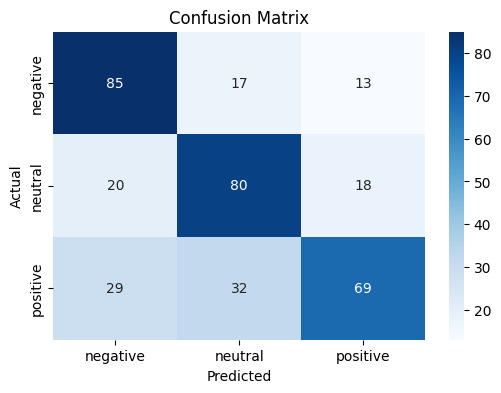

In [ ]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LSTM

In [ ]:
# ---------------------------- LSTM ----------------------------

# Convert X (decribed in vectorization part) to dense array
X_array = vectorized_array

# Ensure labels are in array format
y = np.array(numeric_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

# Reshape X_train for LSTM: (samples, time_steps, features)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print("X_train shape:", X_train.shape)  # Expected: (samples, features, 1)
print("X_test shape:", X_test.shape)

X_train shape: (1452, 5402, 1)
X_test shape: (363, 5402, 1)


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with hyperparameters to tune
def build_lstm_model(hp):
    model = Sequential()

    # LSTM layer with tunable number of units
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),  # (time_steps, features)
        return_sequences=False
    ))

    # Dropout layer with tunable dropout rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense layer with tunable number of units
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))

    # Output layer for classification (3 classes)
    model.add(Dense(3, activation='softmax'))

    # Compile the model with tunable optimizer
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Keras Tuner with Bayesian Optimization
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    directory='lstm_tuning',
    project_name='countvectorizer_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Perform the hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 10 Complete [00h 01m 17s]
val_accuracy: 0.35395190119743347

Best val_accuracy So Far: 0.3711340129375458
Total elapsed time: 00h 09m 02s
Best Hyperparameters: {'units': 256, 'dropout': 0.4, 'dense_units': 128, 'optimizer': 'adam'}


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.3321 - loss: 1.0991 - val_accuracy: 0.2990 - val_loss: 1.0991
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 310ms/step - accuracy: 0.3358 - loss: 1.0993 - val_accuracy: 0.3093 - val_loss: 1.0993
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - accuracy: 0.3114 - loss: 1.0998 - val_accuracy: 0.3643 - val_loss: 1.0976
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.3538 - loss: 1.0996 - val_accuracy: 0.3711 - val_loss: 1.0956
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.3311 - loss: 1.1090 - val_accuracy: 0.3574 - val_loss: 1.0990
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.3273 - loss: 1.0991 - val_accuracy: 0.2990 - val_loss: 1.1002
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.3387 - loss: 1.0987 - val_accuracy: 0.2990 - val_loss: 1.1006
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
Accuracy: 0.3581267217630854
Classification Report:
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


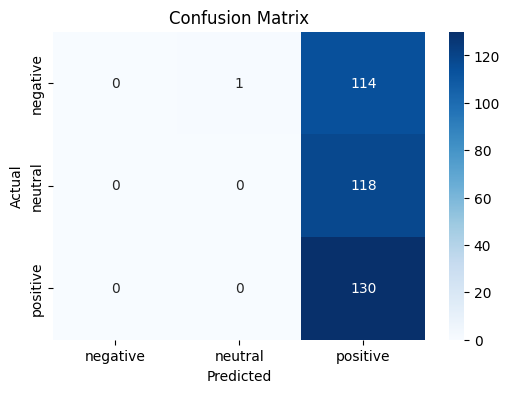

In [ ]:
# Build the best model
best_lstm_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_lstm_model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,475 (1.13 MB)

 Trainable params: 297,475 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.3038 - loss: 1.0994 - val_accuracy: 0.2955 - val_loss: 1.1041
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.3491 - loss: 1.1013 - val_accuracy: 0.3540 - val_loss: 1.0987
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.3664 - loss: 1.0981 - val_accuracy: 0.3024 - val_loss: 1.0995
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.3414 - loss: 1.0992 - val_accuracy: 0.2955 - val_loss: 1.0995
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.3475 - loss: 1.0974 - val_accuracy: 0.4192 - val_loss: 1.0963
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.3563 - loss: 1.0973 - val_accuracy: 0.3608 - val_loss: 1.0984
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.3110 - loss: 1.1002 - val_accuracy: 0.3574 - val_loss: 1.0983
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.3081 - loss: 1.0996 - val_accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


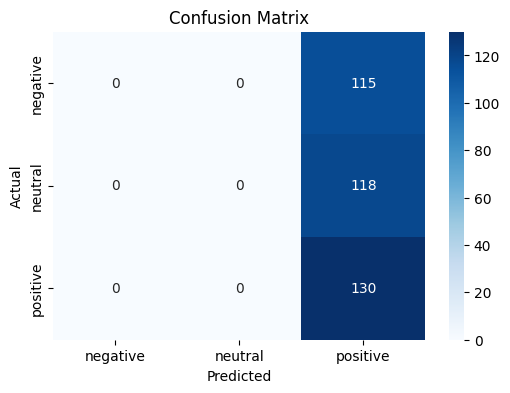

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Best Hyperparameters: {'units': 256, 'dropout': 0.4, 'dense_units': 128, 'optimizer': 'adam'}

# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=256,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.4))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=128,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 2.2.b Vectorization : TF-IDF ✅

In [ ]:
!pip install scikit-learn
!pip install nlp_id
!pip install keras-tuner

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import gensim.downloader as gensim_api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import transformers
import torch
import keras_tuner as kt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# pakai data hasil lemmatization dengan nlp_id
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task1 : Sentiment Analysis /text_lemmatize_1.csv')
df

,sentimen,tweet,tweet_clean
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,prabowo indonesia harga bangsa asing berita ho...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",era jokowi ekonomi indonesia 01 indonesia maju...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",sumatera selatan asi games dampak pd ekonomi l...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara ngutang bngun infrastruktur udah dipake...
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,negarawan sejati sll bangga depan harga bangsa...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,1 hrs ceramah damai indonesia 2 ekonomi baik p...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,mari bangun bangsa dgn dukung ekonomi negara j...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,bantu maju ekonomi bangsa jokowi yuk


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the lemmatized text
X_tfidf = tfidf_vectorizer.fit_transform(lemmatized_texts)

# Convert to array if you want to see the result in array format
vectorized_tfidf_array = X_tfidf.toarray()

# Get feature names (vocabulary terms)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the vectorized text and feature names
print("TF-IDF Feature Names:", tfidf_feature_names)
print("TF-IDF Vectorized Array:\n", vectorized_tfidf_array)

TF-IDF Feature Names: ['000' '01' '01ndonesia' ... 'zippo' 'zon' 'zonk']
TF-IDF Vectorized Array:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.36565686 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
tfidf_vectorizer.vocabulary_

{'prabowo': 3943,
 'indonesia': 1902,
 'harga': 1736,
 'bangsa': 499,
 'asing': 400,
 'berita': 630,
 'hoax': 1809,
 'buat': 813,
 'kuasa': 2571,
 'ya': 5341,
 'rockygerung': 4203,
 'batu': 544,
 'langka': 2641,
 'tasbih': 4831,
 'jokowi': 2131,
 'hadiah': 1702,
 'habib': 1692,
 'luthfi': 2780,
 'mercy': 3047,
 'era': 1389,
 'ekonomi': 1341,
 '01': 1,
 'maju': 2815,
 'menang': 3003,
 'total': 5020,
 'debat': 1062,
 'sumatera': 4710,
 'selatan': 4414,
 'asi': 397,
 'games': 1530,
 'dampak': 1035,
 'pd': 3713,
 'langsung': 2643,
 'prediksi': 3964,
 'capai': 879,
 '18': 31,
 'triliun': 5049,
 'hebat': 1759,
 'negara': 3297,
 'ngutang': 3420,
 'bngun': 739,
 'infrastruktur': 1924,
 'udah': 5144,
 'dipake': 1182,
 'masyarakat': 2936,
 'ngeluh': 3369,
 'utang': 5213,
 'bayar': 553,
 'kalo': 2211,
 'dapet': 1040,
 'hasil': 1750,
 'pajak': 3618,
 'yg': 5370,
 'bisikin': 709,
 'cm': 960,
 'mikirin': 3074,
 'putar': 4057,
 'duit': 1299,
 'golong': 1646,
 'sports': 4640,
 'dr': 1273,
 'sekian': 4

In [ ]:
vectorized_tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.36565686, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Random Forest

In [ ]:
# ---------------------------- RANDOM FOREST ----------------------------

# 1. Split the data into training and testing sets
X = vectorized_tfidf_array
y = numeric_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)

X_train shape: (1452, 5402)
X_test shape: (363, 5402)
Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following e

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Score: 0.6136363636363636


Accuracy: 0.6060606060606061
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.70      0.63       115
     neutral       0.59      0.60      0.60       118
    positive       0.66      0.53      0.59       130

    accuracy                           0.61       363
   macro avg       0.61      0.61      0.61       363
weighted avg       0.61      0.61      0.60       363

Confusion Matrix:
 [[80 21 14]
 [26 71 21]
 [33 28 69]]


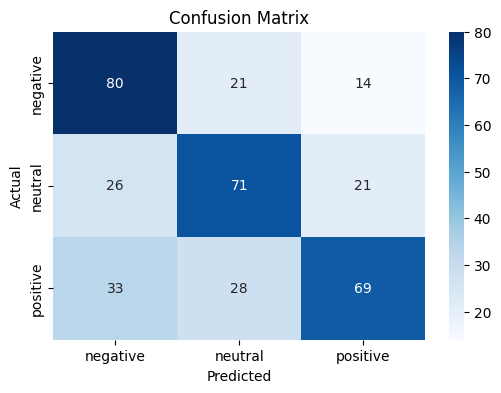

In [ ]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LSTM

In [ ]:
# ---------------------------- LSTM ----------------------------

# Convert X (decribed in vectorization part) to dense array
X_array = vectorized_tfidf_array

# Ensure labels are in array format
y = np.array(numeric_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

# Reshape X_train for LSTM: (samples, time_steps, features)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print("X_train shape:", X_train.shape)  # Expected: (samples, features, 1)
print("X_test shape:", X_test.shape)

X_train shape: (1452, 5402, 1)
X_test shape: (363, 5402, 1)


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with hyperparameters to tune
def build_lstm_model(hp):
    model = Sequential()

    # LSTM layer with tunable number of units
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),  # (time_steps, features)
        return_sequences=False
    ))

    # Dropout layer with tunable dropout rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense layer with tunable number of units
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))

    # Output layer for classification (3 classes)
    model.add(Dense(3, activation='softmax'))

    # Compile the model with tunable optimizer
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Keras Tuner with Bayesian Optimization
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    directory='lstm_tuning',
    project_name='tfidf_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Perform the hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 10 Complete [00h 00m 41s]
val_accuracy: 0.3505154550075531

Best val_accuracy So Far: 0.35738831758499146
Total elapsed time: 00h 07m 18s
Best Hyperparameters: {'units': 192, 'dropout': 0.30000000000000004, 'dense_units': 96, 'optimizer': 'adam'}


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 0.3197 - loss: 1.0996 - val_accuracy: 0.2955 - val_loss: 1.0990
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.3185 - loss: 1.0990 - val_accuracy: 0.3540 - val_loss: 1.0989
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.3542 - loss: 1.0993 - val_accuracy: 0.2955 - val_loss: 1.0993
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - accuracy: 0.3475 - loss: 1.0987 - val_accuracy: 0.2955 - val_loss: 1.0994
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.3822 - loss: 1.0974 - val_accuracy: 0.3540 - val_loss: 1.0967
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.3284 - loss: 1.1009 - val_accuracy: 0.3024 - val_loss: 1.0993
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.3351 - loss: 1.0993 - val_accuracy: 0.2955 - val_loss: 1.1000
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.3561 - loss: 1.0983 - val_accurac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


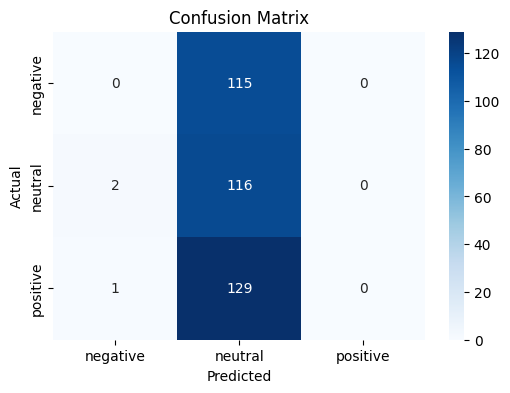

In [ ]:
# Build the best model
best_lstm_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_lstm_model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 192)                 │         738,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 96)                  │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 3)                   │             291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 756,867 (2.89 MB)

 Trainable params: 756,867 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4093 - loss: 1.0798 - val_accuracy: 0.5258 - val_loss: 0.9817
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5070 - loss: 1.0019 - val_accuracy: 0.5189 - val_loss: 0.9680
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4986 - loss: 0.9729 - val_accuracy: 0.5086 - val_loss: 0.9650
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5004 - loss: 0.9954 - val_accuracy: 0.5876 - val_loss: 0.9214
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5634 - loss: 0.9045 - val_accuracy: 0.5979 - val_loss: 0.9285
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5872 - loss: 0.8596 - val_accuracy: 0.5636 - val_loss: 0.9201
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5777 - loss: 0.8972 - val_accuracy: 0.5739 - val_loss: 0.9229
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5770 - loss: 0.8791 - val_accuracy: 0.5773 - va

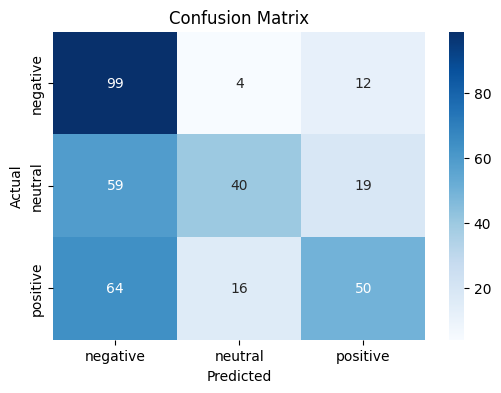

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Best Hyperparameters: {'units': 192, 'dropout': 0.30000000000000004, 'dense_units': 96, 'optimizer': 'adam'}

# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=192,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.3))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=96,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 2.2.c Vectorization : Word2Vec ✅

In [1]:
pip install gensim nltk

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
# pakai data hasil lemmatization dengan nlp_id
df = pd.read_csv('/content/sentiment_tweet (1).csv')
df

,sentimen,tweet_clean
0,negatif,kata prabowo indonesia tidak dihargai bangsa a...
1,netral,batuan langka tasbih jokowi hadiah dari habib ...
2,netral,di era jokowi ekonomi indonesia semakin baik 0...
3,positif,bagi sumatera selatan asian games berdampak pa...
4,negatif,negara kita ngutang buat bangun infrastruktur ...
...,...,...
1810,netral,negarawan sejati selalu bangga dan mengedepank...
1811,netral,1 harus ceramah di damai indonesiaku 2 perekon...
1812,netral,mari bangun bangsa dengan mendukung perekonomi...
1813,netral,bantu majukan perekonomian bangsa bersama pak ...


In [5]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [8]:
# Tokenize the lemmatized texts
tokenized_texts = [word_tokenize(text.lower()) for text in lemmatized_texts]

# Train a Word2Vec model on your corpus
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for future use
word2vec_model.save('word2vec_model.bin')

In [9]:
# Load the trained Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.bin')

def vectorize_text(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are in the model
    return np.mean(word_vectors, axis=0)

# Vectorize all lemmatized texts
w2v_vectorized_texts = np.array([vectorize_text(text, word2vec_model) for text in lemmatized_texts])

print("Vectorized Texts Shape:", w2v_vectorized_texts.shape)


Vectorized Texts Shape: (1815, 100)


In [10]:
w2v_vectorized_texts

array([[ 0.00802368,  0.37026137, -0.08787782, ..., -0.24708708,
         0.22081335, -0.1064918 ],
       [ 0.01422657,  0.17912304, -0.04656043, ..., -0.12348654,
         0.11199601, -0.05523095],
       [ 0.06467421,  0.5547988 , -0.16178489, ..., -0.40661937,
         0.36916804, -0.17402115],
       ...,
       [ 0.02037466,  0.4474738 , -0.11069095, ..., -0.30703753,
         0.2752469 , -0.13114458],
       [ 0.0218636 ,  0.35068282, -0.08761428, ..., -0.24087419,
         0.21646637, -0.10351624],
       [ 0.05663387,  0.3999897 , -0.13046952, ..., -0.30717677,
         0.2821193 , -0.12416619]], dtype=float32)

In [19]:
vector = word2vec_model.wv['jokowi']
similar_words = word2vec_model.wv.most_similar('jokowi', topn=5)
print(similar_words)

[('lagi', 0.9997624754905701), ('indonesia', 0.9997299909591675), ('yang', 0.9997285604476929), ('banyak', 0.9997197389602661), ('malah', 0.999688446521759)]


### Random Forest

In [ ]:
# ---------------------------- RANDOM FOREST ----------------------------

# 1. Split the data into training and testing sets
X = w2v_vectorized_texts
y = numeric_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)

X_train shape: (1452, 100)
X_test shape: (363, 100)
Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/skle

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Score: 0.4772727272727273


Accuracy: 0.418732782369146
Classification Report:
               precision    recall  f1-score   support

    negative       0.41      0.54      0.46       115
     neutral       0.42      0.34      0.38       118
    positive       0.43      0.38      0.41       130

    accuracy                           0.42       363
   macro avg       0.42      0.42      0.42       363
weighted avg       0.42      0.42      0.41       363

Confusion Matrix:
 [[62 23 30]
 [43 40 35]
 [48 32 50]]


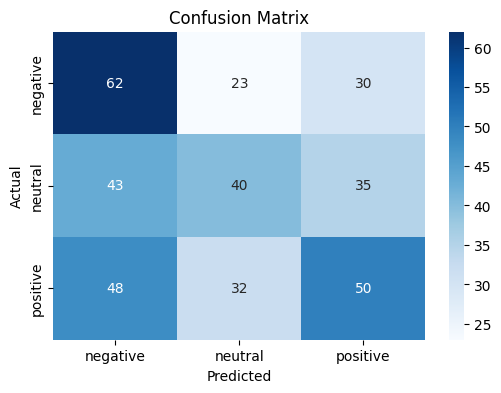

In [ ]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LSTM

In [ ]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Train Word2Vec on the lemmatized texts
lemmatized_texts = df['tweet_clean'].apply(lambda x: x.split())  # Split sentences into words
word2vec_model = Word2Vec(sentences=lemmatized_texts, vector_size=100, window=5, min_count=1)

# Get the word vectors from Word2Vec model
word_vectors = word2vec_model.wv

# Convert each word in the sentence to its corresponding word vector
def get_word_vector_sequence(text):
    return [word_vectors[word] for word in text if word in word_vectors]

# Apply this function to your lemmatized texts
X = lemmatized_texts.apply(get_word_vector_sequence)

# Pad sequences to ensure equal length for LSTM
max_sequence_length = 100  # Adjust this based on your dataset
X_padded = pad_sequences(X, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

# Labels remain the same
y = numeric_labels

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the LSTM model
def build_lstm_model(hp):
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))

    # Dropout
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))

    # Output layer
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Initialize the Bayesian Optimization tuner
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',    # We want to optimize validation accuracy
    max_trials=30,               # Number of different hyperparameter sets to try
    directory='my_tuning',       # Directory to save logs
    project_name='word2vec_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Perform the hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 30 Complete [00h 00m 05s]
val_accuracy: 0.2955326437950134

Best val_accuracy So Far: 0.4536082446575165
Total elapsed time: 00h 03m 24s
Best Hyperparameters: {'units': 96, 'dropout': 0.4, 'dense_units': 128, 'optimizer': 'adam'}


In [ ]:
# Build the model with the best hyperparameters
best_lstm_model = tuner.hypermodel.build(best_hps)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy: 0.30303030303030304
Classification Report:
               precision    recall  f1-score   support

    negative       0.33      0.59      0.42       115
     neutral       0.26      0.34      0.29       118
    positive       1.00      0.02      0.03       130

    accuracy                           0.30       363
   macro avg       0.53      0.32      0.25       363
weighted avg       0.55      0.30      0.24       363

Confusion Matrix:
 [[68 47  0]
 [78 40  0]
 [61 67  2]]


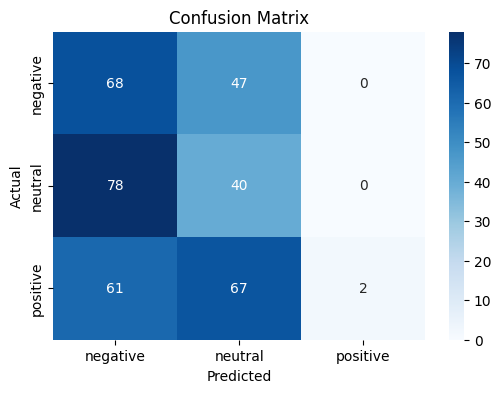

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the tuned LSTM model on the test data
y_pred_probs = best_lstm_model.predict(X_test)  # Get predicted probabilities

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1) # Get class labels from probabilities

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 96)                  │         332,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 344,963 (1.32 MB)

 Trainable params: 344,963 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3686 - loss: 1.0941 - val_accuracy: 0.5155 - val_loss: 1.0346
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4526 - loss: 1.0549 - val_accuracy: 0.5326 - val_loss: 0.9639
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5111 - loss: 0.9825 - val_accuracy: 0.5498 - val_loss: 0.9430
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5298 - loss: 0.9693 - val_accuracy: 0.5258 - val_loss: 0.9661
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5506 - loss: 0.9348 - val_accuracy: 0.5326 - val_loss: 0.9677
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5459 - loss: 0.9434 - val_accuracy: 0.4742 - val_loss: 0.9703
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Accuracy: 0.512396694214876
Classification Report:
               precision    recall  f1-score   support

    negative       0.61      0.38      0.47       115
     neutral       0.71      0.30    

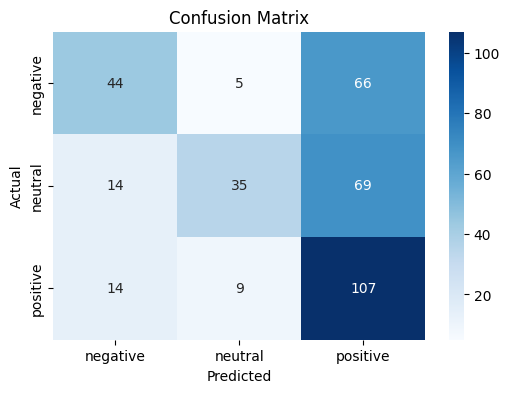

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Best Hyperparameters: {'units': 96, 'dropout': 0.4, 'dense_units': 128, 'optimizer': 'adam'}

# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=96,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.4))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=128,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 2.2.d Vectorization : BERT ✅

In [20]:
!pip install transformers torch

In [21]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd

In [25]:
# pakai data hasil lemmatization dengan nlp_id
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task1 : Sentiment Analysis /text_lemmatize_1.csv')
df

,sentimen,tweet,tweet_clean
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,prabowo indonesia harga bangsa asing berita ho...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",era jokowi ekonomi indonesia 01 indonesia maju...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",sumatera selatan asi games dampak pd ekonomi l...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara ngutang bngun infrastruktur udah dipake...
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,negarawan sejati sll bangga depan harga bangsa...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,1 hrs ceramah damai indonesia 2 ekonomi baik p...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,mari bangun bangsa dgn dukung ekonomi negara j...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,bantu maju ekonomi bangsa jokowi yuk


In [26]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [29]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
model = BertModel.from_pretrained('indobenchmark/indobert-base-p1')

def vectorize_text_bert(text, tokenizer, model):
    # Tokenize and convert text to BERT input format
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the mean of the last hidden state as the text representation
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Vectorize all lemmatized texts
vectorized_texts_bert = np.array([vectorize_text_bert(text, tokenizer, model) for text in df['tweet_clean']])

print("BERT Vectorized Texts Shape:", vectorized_texts_bert.shape)

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

BERT Vectorized Texts Shape: (1815, 768)


In [30]:
vectorized_texts_bert

array([[ 0.20534964,  0.6628895 ,  0.5607361 , ...,  1.3294898 ,
        -0.4443704 , -0.44194058],
       [-0.52474463,  0.4586654 , -0.579114  , ...,  0.26860872,
        -0.8468046 , -0.32317445],
       [-0.3578105 ,  0.5654954 ,  0.24007066, ...,  1.5271971 ,
         0.2252012 , -0.10300672],
       ...,
       [-0.5376913 ,  1.468011  , -0.5101221 , ...,  1.2364458 ,
        -0.4182303 ,  0.6196149 ],
       [-0.5801235 ,  0.991102  ,  0.18589458, ...,  1.6982623 ,
         0.07783915,  0.09017915],
       [-0.25947112,  0.7529974 , -0.19971475, ...,  1.5012077 ,
        -0.01388064,  0.17391537]], dtype=float32)

### Random Forest

In [34]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [35]:
X = vectorized_texts_bert
y = numeric_labels
# Continue with the same Random Forest workflow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Score: 0.6308539944903582


Accuracy: 0.6308539944903582
Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.71      0.67       115
     neutral       0.62      0.61      0.62       118
    positive       0.64      0.58      0.60       130

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.63       363
weighted avg       0.63      0.63      0.63       363

Confusion Matrix:
 [[82 19 14]
 [17 72 29]
 [30 25 75]]


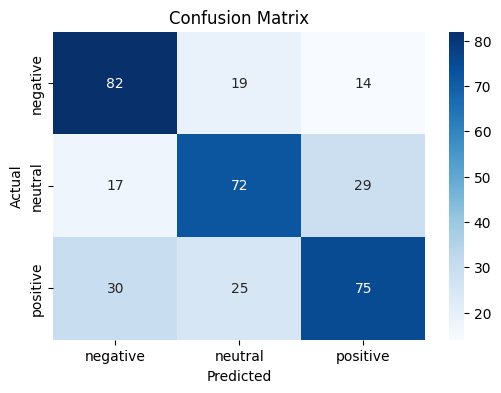

In [38]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LSTM

In [43]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [46]:
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import LSTM, Dropout, Dense # Import LSTM, Dropout, and Dense
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping


In [47]:
# ---------------------------- LSTM ----------------------------
# Use the same BERT vectorized embeddings as in Random Forest
X = vectorized_texts_bert
y = numeric_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM, but note that since BERT embeddings are static (not sequential),
# you don't need to add an extra dimension like with Word2Vec.
X_train = np.expand_dims(X_train, axis=1)  # Add a dummy "time step" axis
X_test = np.expand_dims(X_test, axis=1)

# Convert y_train to a NumPy array
y_train = np.array(y_train)

# Define the LSTM model using Keras Tuner
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Continue with Keras Tuner for hyperparameter tuning (same as before)
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=20,
    directory='my_tuning',
    project_name='bert_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 20 Complete [00h 00m 06s]
val_accuracy: 0.7147766351699829

Best val_accuracy So Far: 0.7491409182548523
Total elapsed time: 00h 01m 49s
Best Hyperparameters: {'units': 192, 'dropout': 0.30000000000000004, 'dense_units': 128, 'optimizer': 'rmsprop'}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 192)                 │         738,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 763,139 (2.91 MB)

 Trainable params: 763,139 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5228 - loss: 0.9916 - val_accuracy: 0.5704 - val_loss: 0.8913
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6070 - loss: 0.8555 - val_accuracy: 0.7045 - val_loss: 0.7565
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6408 - loss: 0.7916 - val_accuracy: 0.6804 - val_loss: 0.7262
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6640 - loss: 0.7478 - val_accuracy: 0.6151 - val_loss: 0.8869
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6780 - loss: 0.6910 - val_accuracy: 0.7113 - val_loss: 0.7122
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7240 - loss: 0.6631 - val_accuracy: 0.6907 - val_loss: 0.7435
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7468 - loss: 0.5871 - val_accuracy: 0.5842 - val_loss: 1.0778
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7500 - loss: 0.5932 - val_accuracy: 0.6770 - val_loss

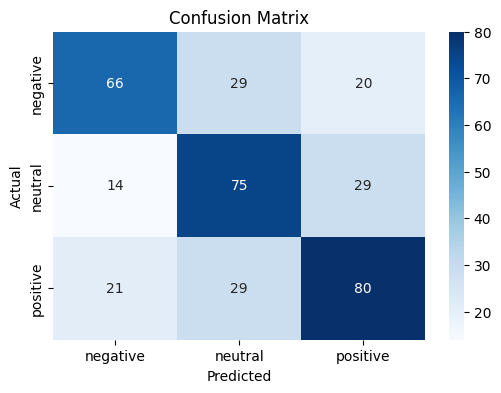

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Best Hyperparameters: {'units': 224, 'dropout': 0.30000000000000004, 'dense_units': 96, 'optimizer': 'adam'}
#Best Hyperparameters: {'units': 192, 'dropout': 0.30000000000000004, 'dense_units': 128, 'optimizer': 'rmsprop'}
# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=192,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.3))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=128,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='rmsprop',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 2.2.e Vectorization : RoBERTa ✅

In [49]:
from transformers import RobertaTokenizer, RobertaModel
import torch
import numpy as np
import pandas as pd

In [50]:
# pakai data hasil lemmatization dengan nlp_id
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task1 : Sentiment Analysis /text_lemmatize_1.csv')
df

,sentimen,tweet,tweet_clean
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,prabowo indonesia harga bangsa asing berita ho...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",era jokowi ekonomi indonesia 01 indonesia maju...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",sumatera selatan asi games dampak pd ekonomi l...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara ngutang bngun infrastruktur udah dipake...
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,negarawan sejati sll bangga depan harga bangsa...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,1 hrs ceramah damai indonesia 2 ekonomi baik p...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,mari bangun bangsa dgn dukung ekonomi negara j...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,bantu maju ekonomi bangsa jokowi yuk


In [51]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [53]:
from transformers import RobertaTokenizer, TFRobertaModel

# Load pre-trained RoBERTa model and tokenizer
model_name='cahya/roberta-base-indonesian-522M'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name) # Load RobertaModel instead of TFRobertaModel


# Load pre-trained RoBERTa model and tokenizer
#tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
#model = RobertaModel.from_pretrained('roberta-base')

def vectorize_text_roberta(text, tokenizer, model):
    # Tokenize and convert text to RoBERTa input format
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the mean of the last hidden state as the text representation
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Vectorize all lemmatized texts
vectorized_text_roberta = np.array([vectorize_text_roberta(text, tokenizer, model) for text in df['tweet_clean']])

print("Vectorized Texts Shape:", vectorized_text_roberta.shape)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/507M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Vectorized Texts Shape: (1815, 768)


In [54]:
vectorized_text_roberta

array([[ 0.32455954, -0.11453831,  0.89482355, ...,  0.07466394,
        -0.28816515,  0.06718644],
       [ 1.1666994 , -0.32602394,  0.23529223, ...,  0.5242503 ,
        -0.89529186,  0.08525777],
       [ 0.40930787, -0.7401325 ,  0.6077017 , ..., -0.2411809 ,
        -0.7370695 , -0.2688654 ],
       ...,
       [ 0.16017482,  0.25769866,  0.513238  , ..., -0.7914207 ,
        -0.31207398,  0.0501593 ],
       [ 0.7031877 , -0.32529566,  0.47171724, ..., -0.47674102,
        -0.57575595, -0.07839984],
       [-0.08532709,  0.0393335 ,  0.12482522, ..., -0.34054846,
        -1.1037196 ,  0.13898993]], dtype=float32)

### Random Forest

In [55]:
X = vectorized_text_roberta
y = numeric_labels
# Continue with the same Random Forest workflow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
369 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Score: 0.5915977961432507


Accuracy: 0.5867768595041323
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.64      0.61       115
     neutral       0.56      0.59      0.58       118
    positive       0.62      0.53      0.57       130

    accuracy                           0.59       363
   macro avg       0.59      0.59      0.59       363
weighted avg       0.59      0.59      0.59       363

Confusion Matrix:
 [[74 24 17]
 [23 70 25]
 [31 30 69]]


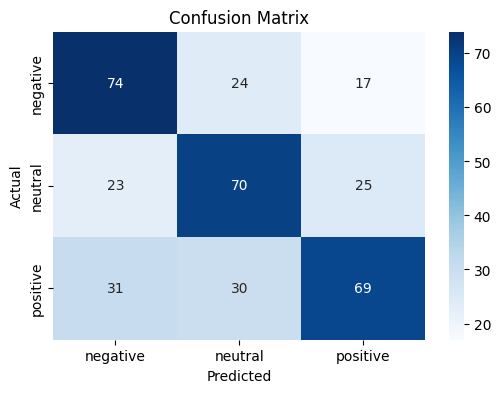

In [56]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LSTM

In [57]:
# ---------------------------- LSTM ----------------------------
# Use the same BERT vectorized embeddings as in Random Forest
X = vectorized_text_roberta
y = numeric_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM, but note that since BERT embeddings are static (not sequential),
# you don't need to add an extra dimension like with Word2Vec.
X_train = np.expand_dims(X_train, axis=1)  # Add a dummy "time step" axis
X_test = np.expand_dims(X_test, axis=1)

# Convert y_train to a NumPy array
y_train = np.array(y_train)

# Define the LSTM model using Keras Tuner
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Continue with Keras Tuner for hyperparameter tuning (same as before)
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=20,
    directory='my_tuning',
    project_name='roberta_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 20 Complete [00h 00m 07s]
val_accuracy: 0.6597937941551208

Best val_accuracy So Far: 0.6941580772399902
Total elapsed time: 00h 02m 02s
Best Hyperparameters: {'units': 32, 'dropout': 0.30000000000000004, 'dense_units': 96, 'optimizer': 'adam'}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 32)                  │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 96)                  │           3,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,987 (414.01 KB)

 Trainable params: 105,987 (414.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4035 - loss: 1.0715 - val_accuracy: 0.5979 - val_loss: 0.9276
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5319 - loss: 0.9744 - val_accuracy: 0.5911 - val_loss: 0.9205
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5525 - loss: 0.9279 - val_accuracy: 0.6254 - val_loss: 0.8568
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6260 - loss: 0.8819 - val_accuracy: 0.6323 - val_loss: 0.8279
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6018 - loss: 0.8692 - val_accuracy: 0.6426 - val_loss: 0.8002
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6077 - loss: 0.8364 - val_accuracy: 0.6564 - val_loss: 0.7904
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6201 - loss: 0.7944 - val_accuracy: 0.6701 - val_loss: 0.7952
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6587 - loss: 0.7656 - val_accuracy: 0.6426 - val_loss

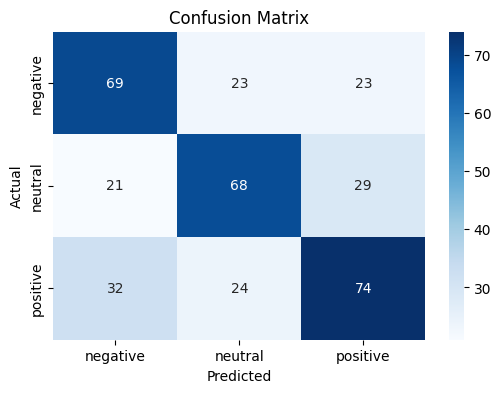

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Best Hyperparameters: {'units': 32, 'dropout': 0.30000000000000004, 'dense_units': 96, 'optimizer': 'adam'}

# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=32,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.3))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=96,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 2.2.f Vectorization : GPT ✅

In [62]:
from transformers import GPT2Tokenizer, GPT2Model
import torch
import numpy as np
import pandas as pd

In [59]:
# pakai data hasil lemmatization dengan nlp_id
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task1 : Sentiment Analysis /text_lemmatize_1.csv')
df

,sentimen,tweet,tweet_clean
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,prabowo indonesia harga bangsa asing berita ho...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",era jokowi ekonomi indonesia 01 indonesia maju...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",sumatera selatan asi games dampak pd ekonomi l...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara ngutang bngun infrastruktur udah dipake...
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,negarawan sejati sll bangga depan harga bangsa...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,1 hrs ceramah damai indonesia 2 ekonomi baik p...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,mari bangun bangsa dgn dukung ekonomi negara j...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,bantu maju ekonomi bangsa jokowi yuk


In [60]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [64]:
# Load pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('flax-community/gpt2-small-indonesian')
model = GPT2Model.from_pretrained('flax-community/gpt2-small-indonesian')

# Set the padding token to the EOS token
tokenizer.pad_token = tokenizer.eos_token

def vectorize_text_gpt(text, tokenizer, model):
    # Tokenize and convert text to GPT input format
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the mean of the last hidden state as the text representation
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Vectorize all lemmatized texts
vectorized_texts_gpt = np.array([vectorize_text_gpt(text, tokenizer, model) for text in df['tweet_clean']])

print("GPT Vectorized Texts Shape:", vectorized_texts_gpt.shape)

tokenizer_config.json:   0%|          | 0.00/207 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/863 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

GPT Vectorized Texts Shape: (1815, 768)


In [65]:
vectorized_texts_gpt

array([[-0.00451921,  0.04895328, -0.28004217, ..., -0.06216229,
         0.01352287, -0.08852159],
       [-0.07651021, -0.0633264 ,  0.09089466, ..., -0.0255767 ,
         0.03985057, -0.01258088],
       [ 0.02686442,  0.18886995, -0.3049853 , ..., -0.17302005,
         0.06407375, -0.06683288],
       ...,
       [-0.03658132,  0.07282837, -0.24594443, ..., -0.13277444,
         0.02135443, -0.07638349],
       [ 0.02875364, -0.03885534, -0.20333037, ..., -0.12733017,
        -0.00185757, -0.03746392],
       [ 0.00717035,  0.15591982, -0.2674899 , ..., -0.09546614,
         0.00354187, -0.0781711 ]], dtype=float32)

### Random Forest

In [66]:
X = vectorized_texts_gpt
y = numeric_labels
# Continue with the same Random Forest workflow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Score: 0.6267217630853994


Accuracy: 0.6308539944903582
Classification Report:
               precision    recall  f1-score   support

    negative       0.60      0.70      0.65       115
     neutral       0.64      0.64      0.64       118
    positive       0.65      0.55      0.60       130

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.63       363
weighted avg       0.63      0.63      0.63       363

Confusion Matrix:
 [[81 18 16]
 [20 76 22]
 [33 25 72]]


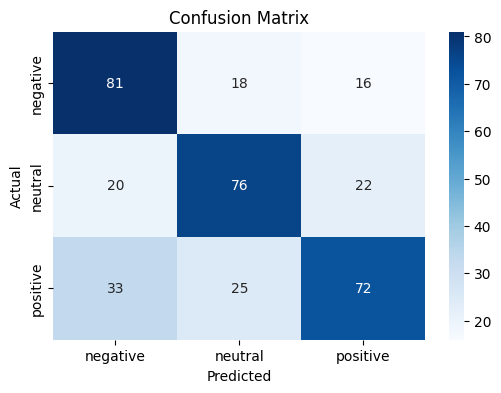

In [67]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### LSTM

In [68]:
# ---------------------------- LSTM ----------------------------
# Use the same BERT vectorized embeddings as in Random Forest
X = vectorized_texts_gpt
y = numeric_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM, but note that since BERT embeddings are static (not sequential),
# you don't need to add an extra dimension like with Word2Vec.
X_train = np.expand_dims(X_train, axis=1)  # Add a dummy "time step" axis
X_test = np.expand_dims(X_test, axis=1)

# Convert y_train to a NumPy array
y_train = np.array(y_train)

# Define the LSTM model using Keras Tuner
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Continue with Keras Tuner for hyperparameter tuning (same as before)
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=20,
    directory='my_tuning',
    project_name='gpt_lstm'
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps.values}")

Trial 20 Complete [00h 00m 05s]
val_accuracy: 0.6975945234298706

Best val_accuracy So Far: 0.7285223603248596
Total elapsed time: 00h 01m 59s
Best Hyperparameters: {'units': 128, 'dropout': 0.4, 'dense_units': 128, 'optimizer': 'adam'}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │         459,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 476,163 (1.82 MB)

 Trainable params: 476,163 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4074 - loss: 1.0676 - val_accuracy: 0.6186 - val_loss: 0.8528
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5926 - loss: 0.8852 - val_accuracy: 0.6598 - val_loss: 0.7845
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5945 - loss: 0.8495 - val_accuracy: 0.6804 - val_loss: 0.7573
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6493 - loss: 0.7763 - val_accuracy: 0.6735 - val_loss: 0.7559
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6690 - loss: 0.7296 - val_accuracy: 0.6495 - val_loss: 0.7817
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6996 - loss: 0.7007 - val_accuracy: 0.6632 - val_loss: 0.7610
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6874 - loss: 0.7014 - val_accuracy: 0.6804 - val_loss: 0.7491
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7219 - loss: 0.6906 - val_accuracy: 0.6942 - val_loss

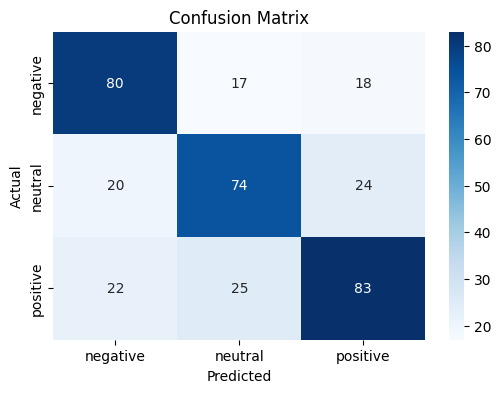

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Best Hyperparameters: {'units': 160, 'dropout': 0.30000000000000004, 'dense_units': 128, 'optimizer': 'adam'}
## Best Hyperparameters: {'units': 128, 'dropout': 0.4, 'dense_units': 128, 'optimizer': 'adam'}
# Function to build LSTM model with best hyperparameters
def build_best_lstm_model():
    model = Sequential()

    # LSTM layer
    model.add(LSTM(
        units=128,                      # Best 'units' value
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Input shape
        return_sequences=False
    ))

    # Dropout layer to prevent overfitting
    model.add(Dropout(rate=0.4))         # Best 'dropout' value

    # Dense layer
    model.add(Dense(
        units=128,                        # Best 'dense_units' value
        activation='relu'
    ))

    # Output layer (3 classes: negative, neutral, positive)
    model.add(Dense(3, activation='softmax'))

    # Compile the model using the best optimizer
    model.compile(
        optimizer='adam',                # Best 'optimizer' value
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the LSTM model using the best hyperparameters
best_lstm_model = build_best_lstm_model()

# Display the model architecture
best_lstm_model.summary()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

best_lstm_model.fit(
    X_train, y_train,
    epochs=15,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
y_pred_probs = best_lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 3. Testing & Evaluation